In [2]:
import tensorflow as tf
from tensorflow.examples.tutorials.mnist import input_data 

In [5]:
mnist=input_data.read_data_sets("MNIST_data/",one_hot=True)

Extracting MNIST_data/train-images-idx3-ubyte.gz
Extracting MNIST_data/train-labels-idx1-ubyte.gz
Extracting MNIST_data/t10k-images-idx3-ubyte.gz
Extracting MNIST_data/t10k-labels-idx1-ubyte.gz


In [6]:
mnist.train.images

array([[0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

In [7]:
mnist.train.num_examples

55000

In [8]:
mnist.test.num_examples

10000

In [10]:
mnist.validation.num_examples

5000

In [11]:
import matplotlib.pyplot as plt
%matplotlib inline 

In [12]:
mnist.train.images[1].shape

(784,)

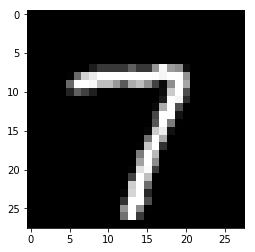

In [13]:
plt.imshow(mnist.train.images[100].reshape(28,28),cmap='gist_gray')

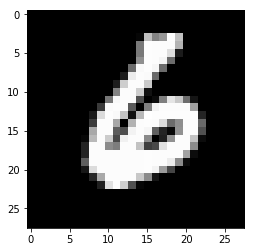

In [14]:
plt.imshow(mnist.train.images[99].reshape(28,28),cmap='gist_gray')

In [17]:
x=tf.placeholder(tf.float32,shape=[None,784])
w=tf.Variable(tf.zeros([784,10]))


Instructions for updating:
Colocations handled automatically by placer.


In [18]:
b=tf.Variable(tf.zeros([10]))

In [19]:
y=tf.matmul(x,w)+b

In [21]:
y_true=tf.placeholder(tf.float32,[None,10])

In [23]:
cross_entropy=tf.reduce_mean(tf.nn.softmax_cross_entropy_with_logits(labels=y_true,logits=y))

In [24]:
optimizer=tf.train.GradientDescentOptimizer(learning_rate=0.5)

In [25]:
train=optimizer.minimize(cross_entropy)

In [27]:
init=tf.global_variables_initializer()

In [31]:
sess=tf.Session()
sess.run(init)
for step in range(1000):
    batch_x,batch_y=mnist.train.next_batch(100)
    sess.run(train,feed_dict={x:batch_x,y_true:batch_y})

In [33]:
matches=tf.equal(tf.argmax(y,1),tf.argmax(y_true,1))

In [34]:
acc=tf.reduce_mean(tf.cast(matches,tf.float32))

In [35]:
print(sess.run(acc,feed_dict={x:mnist.test.images,y_true:mnist.test.labels}))

0.9179
